# What is Statistical Inference? 

In statistical inference, what we typically do is make guesses about a parameter.  There are typically two kinds of things we try to guess at: 

* How confident are we about the value of a parameter? (Confidence Estimation)
* How valid is our hypothesis about the parameter? (Hypothesis Testing)

## Statistical Notation

For Quantitative Variables: 

* Population Mean: $\mu$
* Sample Mean: $\hat{\mu}$ or $\bar{x}$
* Population Standard Deviation: $\sigma$
* Sample Standard Deviation: $\hat{\sigma}$

For Categorical Variables: 

* Population Proportion: $p$
* Sample Proportion: $\hat{p}$

For Margin of Error: 

* 95% Multiplier for Standard Samples: $z*$
* 95% Multiplier for Small Samples: $t*$ (derived from t-distribution)

For Normal Distribution Curves: 

* Normal Distribution with given mean and standard deviation: $N(\mu, \sigma)$

## Python Basics

Most statistical inference is done using the following libraries: 

* Numpy: It is used to work with uniform arrays of values that are used to represent data.
* Pandas: It is used to store, manipulate, and analyze data.
* Matplotlib: It is used  to visualize data.
* Seaborn: It is used as a high level interface to Matplotlib.
* Scipy: It is used to work with probability functions from statistical distributions
* Statsmodel: It is used to do data exploration, statistical testing, and statistical modelling

In [10]:
# import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels as sm

In [28]:
# numpy
np.random.seed(123) # ensure reproducibility in random generator
x= np.random.normal(size=5) # generate array of len 5 with random numbers from normal distribution
print("x is ",x)
logx= np.square(x)
print("log of x is ",logx)
y= np.linspace (1, 4, 6) # generate 6 numbers between 1 and 4 of len
print("y is ",y)
z=np.arange(1,4,0.5) # generate numbers between 1 and 4 with a gap of 0.5
print("z is ",z)
addyz= y+z
print("addition of y and z is ",addyz)
#help(np.sort)

x is  [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
log of x is  [1.17859381 0.99469794 0.08007683 2.26892377 0.33477825]
y is  [1.  1.6 2.2 2.8 3.4 4. ]
z is  [1.  1.5 2.  2.5 3.  3.5]
addition of y and z is  [2.  3.1 4.2 5.3 6.4 7.5]


In [29]:
# pandas
df=pd.read_csv("CartwheelData.csv")
print(df.head())
print(df.columns)
print(df["Gender"].unique())
print(df.iloc[0:3, 0:3])
#help(pd.DataFrame.drop)

   ID  Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1   56      F            1       Y             1    62.0      61.0   
1   2   26      F            1       Y             1    62.0      60.0   
2   3   33      F            1       Y             1    66.0      64.0   
3   4   39      F            1       N             0    64.0      63.0   
4   5   27      M            2       N             0    73.0      75.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y              1      7  
1          70        Y              1      8  
2          85        Y              1      7  
3          87        Y              1     10  
4          72        N              0      4  
Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')
['F' 'M']
   ID  Age Gender
0   1   56      F
1   2   26      F
2   3   33      F


Text(0.5, 1.0, 'Histogram of Cartwheel Distances')

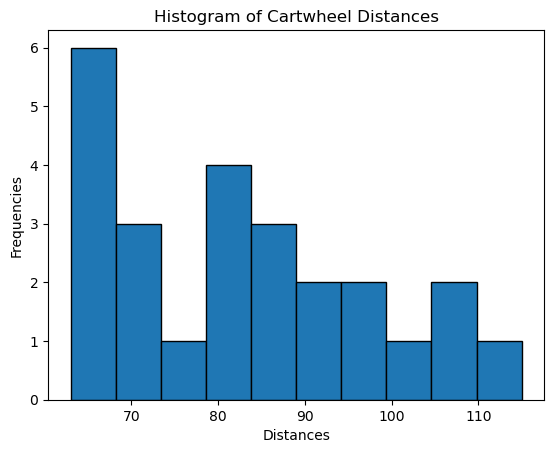

In [21]:
# matplotlib
plt.hist(df["CWDistance"], bins=10,edgecolor="black")
plt.xlabel("Distances")
plt.ylabel("Frequencies")
plt.title("Histogram of Cartwheel Distances")

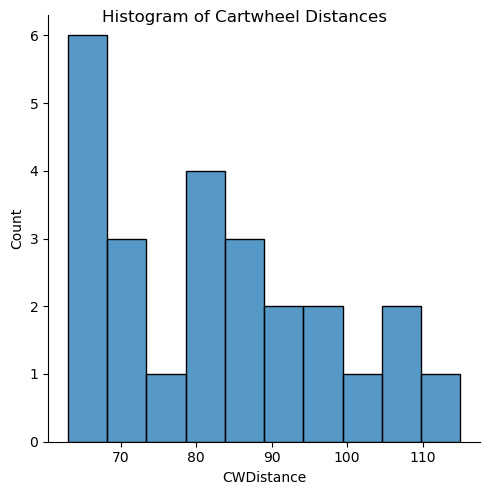

In [22]:
# seaborn
x= sns.displot(df["CWDistance"],kde=False, bins=10)
x.fig.suptitle("Histogram of Cartwheel Distances")
x

In [23]:
# scipy
# probability mass function of binomial distribution
# probability of getting exactly 3 heads in 10 flips of a fair coin
print(stats.binom(10, 0.5).pmf(3))

0.11718750000000004


In [25]:
# statsmodels
import statsmodels.api as sma
import statsmodels.formula.api as smf
# load data
data = sma.datasets.get_rdataset("Guerry", "HistData").data
print(data)
# fit regression models Ordinary Least Square (OLS)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=data).fit()
print(results.summary())

    dept Region    Department  Crime_pers  Crime_prop  Literacy  Donations  \
0      1      E           Ain       28870       15890        37       5098   
1      2      N         Aisne       26226        5521        51       8901   
2      3      C        Allier       26747        7925        13      10973   
3      4      E  Basses-Alpes       12935        7289        46       2733   
4      5      E  Hautes-Alpes       17488        8174        69       6962   
..   ...    ...           ...         ...         ...       ...        ...   
81    86      W        Vienne       15010        4710        25       8922   
82    87      C  Haute-Vienne       16256        6402        13      13817   
83    88      E        Vosges       18835        9044        62       4040   
84    89      C         Yonne       18006        6516        47       4276   
85   200    NaN         Corse        2199        4589        49      37015   

    Infants  Suicides MainCity  ...  Crime_parents  Infanticide

# Confidence Estimation

It is a type of statistical inference process that allows us to estimate confidence in the estimated parameter value. The estimated parameter value can be: 

1. Population Parameter (for a single population)
2. Population Difference Parameter (for comparing difference in two populations) 

## Case 1: Population Parameter

The process for confidence estimation is: 

1. From an unbiased sample, compute the point estimate of the parameter as $\hat{p}$  (the value that the hypothetical sampling distribution will center on).
2. From the sample, compute the estimate of variance (the variance of the hypothetical sampling distribution).The square root is the estimated standard error.
3. Form a confidence interval (CI) as *Estimate $\pm$ Margin of Error* where *Estimate* is the unbiased point estimate and *Margin of Error* is a few estimated Standard Errors (where few depends on desired confidence level and sample design).

**For Value Parameter**
   
To calculate parameter confidence interval with estimated parameter $\hat{\mu}$ and estimated variance $\hat{\sigma}$

$$ CI= \hat{\mu} \pm t*\frac{\hat{\sigma}}{\sqrt{n}}$$

**For Proportion Parameter**

To calculate proportion confidence interval with estimated proportion $\hat{p}$ 

$$ CI= \hat{p} \pm z*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

To calculate with conservative estimate we replace $\hat{p}$ with 0.5 to get

$$ CI= \hat{p} \pm z*\sqrt{\frac{1}{2\sqrt(n)}}$$

We can estimate the sample size if we know the margin of error we want

$$n= \frac{z*^2 p(1-p)}{(MoE)^2}$$

Use the CI to form interpretations: 

1. Our best estimate of the population parameter value is the center of the confidence interval.
2. With x% confidence, the poulation parameter value lies within this confidence interval.
3. Our population parameter value will be within this interval for x% of intervals we calculate with this sampling process.

Note: It does not say there is a x% probability that parameter value is in the confidence interval. The proability is 1 or 0 (we just don't know). All we say is we have x% confidence in our statistical inference procedure. 

### Determining z* and t*

**$z*$ Distribution**

The $z*$ multiplier is applicable for normal distributions and large sample sizes. It is typically used for proportion CIs. We use the Empirical Rule to determine the $z*$ multiplier: 

1. If we want to build 99.7% CI, use 3.00 Estimated Standard Errors
2. If we want to build 99% CI, use 2.57 Estimated Standard Errors
3. If we want to build 98% CI, use 2.32 Estimated Standard Errors
4. If we want to build 95% CI, use 1.96 Estimated Standard Errors
5. If we want to build 90% CI, use 1.64 Estimated Standard Errors
6. If we want to build 68% CI, use 1.00 Estimated Standard Errors

**$t*$ Distribution**

The above no longer remains applicable when our distribution is not normal or we don't have large sample sizes. Moreover, for value parameter CIs, we never have the population standard deviation and we estimate it with $T=\frac{\hat{\mu}- \mu}{s/\sqrt{n}}$ . The sampling distribution of T is more varied and follows a long-tailed t-distribution with $n-1$ degrees of freedom where the tails represent the uncertainty from estimating standard deviation.

The formula for calculating $t*$ is: 

1. Choose confidence level $c$. If 95%, then c=0.95
2. Calculate $\alpha=1-c$
3. Choose y-sided CI and split $y= \frac{\alpha}{n}$
4. Calculate degrees of freedom $df= n-1$
5. Calculate $t* = t_{1-y,df}$ from software or t-table.

The two-sided vs one-sided t-test: 

What we want is a good estimate of population parameter. For this, we can do either of two things. 

1. **Two-Sided**: We divide the margin of error on two tails. Eg: If we want 95% CI, we have 5% uncertainty which we divide on two sides as $Estimate-2.5%$ (lower tail) AND $Estimate+2.5%$ (upper tail).
2. **One-sided**: We put all of that error and uncertainty in one-direction as $Estimate-5%$ (lower tail) OR $Estimate+5%$ (upper tail). This is typically only done if we want to check whether parameter is greater (lower tail focus) or lower (upper tail focus) than a threshold. 

The logic for using t-distribution: 

1. It is suitable for long-tailed distributions with extra uncertainty than normal distributions.
2. The $t*$ values are typically larger than $z*$ values to make confidence intervals wider for more uncertainty.

### Implementation: Value Parameter 

Here we calculate the value parameter estimate on a single population of interest

In [1]:
# Research Question: What is the average cartwheel distance for adults? 
# Population Parameter of Interest: Mean Cartwheel Distance
# Random Sample: Our sample of cartwheel data

# loading data
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("CartwheelData.csv")
print(df.head())

   ID  Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1   56      F            1       Y             1    62.0      61.0   
1   2   26      F            1       Y             1    62.0      60.0   
2   3   33      F            1       Y             1    66.0      64.0   
3   4   39      F            1       N             0    64.0      63.0   
4   5   27      M            2       N             0    73.0      75.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y              1      7  
1          70        Y              1      8  
2          85        Y              1      7  
3          87        Y              1     10  
4          72        N              0      4  


The sample size is:  25
count     25.000000
mean      82.480000
std       15.058552
min       63.000000
25%       70.000000
50%       81.000000
75%       92.000000
max      115.000000
Name: CWDistance, dtype: float64


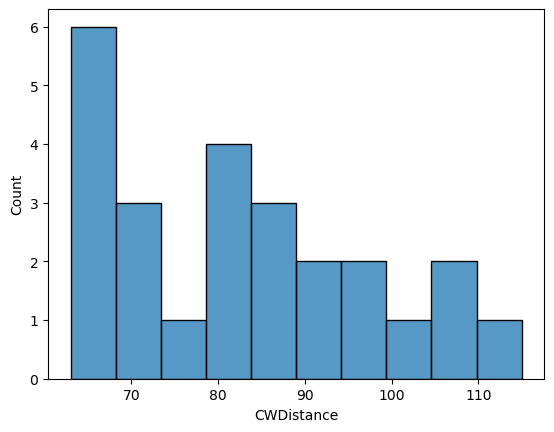

In [2]:
# summarizing data

# checking sample size
n= len(df)
print("The sample size is: ", n)

# checking numerical summary of CWDistance
print(df.describe()["CWDistance"]) # mean higher than median so likely right-skew

# checking graphical summary of CWDistance
# ensure data distribution normality
histogram= sns.histplot(df["CWDistance"], kde=False, bins=10) # we do see right skew

In [3]:
# calculating margin of error

# calculating estimated mean
mean_cd= np.mean(df["CWDistance"])
print("The mean cartwheel distance of our sample is: ", mean_cd)

# calculating estimated standard deviation
std_cd= np.std(df["CWDistance"])
print("The standard deviation of cartwheel distance of our sample is: ", std_cd)


# calculating t*
# we want 95% confidence, two sided test, sample size is n
confidence=0.95
df=n-1
tstar= st.t.ppf((1-(1-confidence)/2), df)
print("The t* is: ", tstar)

# calculating margin of error
moe= tstar* (std_cd/np.sqrt(n))
print("The margin of error is: ", moe)

The mean cartwheel distance of our sample is:  82.48
The standard deviation of cartwheel distance of our sample is:  14.754307845507359
The t* is:  2.063898561628021
The margin of error is:  6.090278948031933


In [5]:
# calculating CI
lowerint= mean_cd-moe
upperint=mean_cd+moe
print(f"The population mean cartwheel distance lies between {lowerint} and {upperint}")

The population mean cartwheel distance lies between 76.38972105196807 and 88.57027894803194


### Implementation: Value Parameter in Paired Data

Paired Data refers to the cases where we have: 

1. Two measurements from same individual (right vs left hand of people, before vs after treatment of a person)
2. Two measurements where each belongs to connected individuals (twins, two models of same family)

Here we calculate the value parameter difference within a pair.

In [1]:
# Research Question: What is the average difference in education for twins? 
# Population Parameter of Interest: Mean Difference in Pairs
# Random Sample: Own data

# create data
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
np.random.seed(123)
data= {
    "Twin1": np.linspace(14,16, 25),
    "Twin2": np.linspace(10,16, 25)
}
df= pd.DataFrame(data)
print(df.head())
print(df.columns)

       Twin1  Twin2
0  14.000000  10.00
1  14.083333  10.25
2  14.166667  10.50
3  14.250000  10.75
4  14.333333  11.00
Index(['Twin1', 'Twin2'], dtype='object')


In [2]:
# create difference column
df["Difference"]= df["Twin1"]- df["Twin2"]
print(df.head())

       Twin1  Twin2  Difference
0  14.000000  10.00    4.000000
1  14.083333  10.25    3.833333
2  14.166667  10.50    3.666667
3  14.250000  10.75    3.500000
4  14.333333  11.00    3.333333


The sample size is:  25
count    25.000000
mean      2.000000
std       1.226633
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Difference, dtype: float64


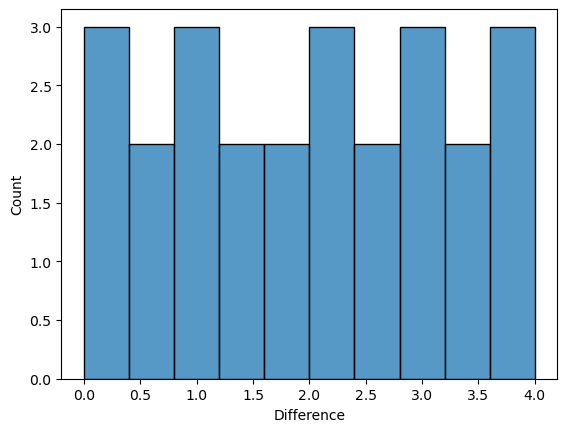

In [3]:
# summarizing data

# checking sample size
n= len(df)
print("The sample size is: ", n)

# checking numerical summary
print(df.describe()["Difference"]) 

# checking graphical summary 
# ensure data distribution normality
histogram= sns.histplot(df["Difference"], kde=False, bins=10) 

In [4]:
# calculating margin of error

# calculating estimated mean
mean_diff= np.mean(df["Difference"])
print("The mean difference of our sample is: ", mean_diff)

# calculating estimated standard deviation
std_diff= np.std(df["Difference"])
print("The standard deviation of differences of our sample is: ", std_diff)


# calculating t*
# we want 95% confidence, two sided test, sample size is n
confidence=0.95
df=n-1
tstar= st.t.ppf((1-(1-confidence)/2), df)
print("The t* is: ", tstar)

# calculating margin of error
moe= tstar* (std_diff/np.sqrt(n))
print("The margin of error is: ", moe)

The mean difference of our sample is:  2.0
The standard deviation of differences of our sample is:  1.2018504251546631
The t* is:  2.063898561628021
The margin of error is:  0.49609947275374694


In [5]:
# calculating CI
lowerint= mean_diff-moe
upperint=mean_diff+moe
print(f"The population mean difference lies between {lowerint} and {upperint}")

The population mean difference lies between 1.5039005272462531 and 2.496099472753747


## Case 2: Population Difference Parameter

The process for confidence estimation is: 

1. From two separate unbiased samples of two populations, we compute two point estimates.
2. Form a confidence interval as *Difference of Estimates $\pm$ Margin of Error*

To calculate the difference in parameter confidence interval for two proportions with estimated variance $\hat{\sigma_1}$ and $\hat{\sigma_2}$

$$ CI= (\hat{\sigma_1}-\hat{\sigma_2}) \pm t*\sqrt{\frac{(\sigma_1)^2}{n_1}+ \frac{(\sigma_2)^2}{n_2}}$$

To calculate difference in proportion confidence interval for two populations with estimated proportions $\hat{p_1}$ and $\hat{p_2}$

$$ CI= (\hat{p_1}-\hat{p_2}) \pm z*\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1}+ \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}$$

Use the CI to form interpretations: 

1. Our best estimate of the difference between two populations lies is the center of the interval.
2. With x% confidence, the populations have a difference value within this confidence interval.
3. If zero lies within this interval, there is no difference between the populations.
4. If zero does not lie within the interval, there is some difference between the populations. 

In [11]:
# Research Question: What is the average cartwheel distance for adult males vs females? 
# Population Parameter of Interest: Mean Cartwheel Distance
# Random Sample: Our sample of cartwheel data

# loading data
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("CartwheelData.csv")

# get two datasets for male and female populations
df_male= df[df["Gender"]=="M"]
print(f"The male population sample size is {len(df_male)}")
df_fem= df[df["Gender"]=="F"]
print(f"The female population sample size is {len(df_fem)}")

The male population sample size is 13
The female population sample size is 12


count     13.000000
mean      84.538462
std       18.187062
min       63.000000
25%       72.000000
50%       81.000000
75%      101.000000
max      115.000000
Name: CWDistance, dtype: float64
count    12.000000
mean     80.250000
std      11.112033
min      65.000000
25%      69.250000
50%      82.000000
75%      87.750000
max      98.000000
Name: CWDistance, dtype: float64


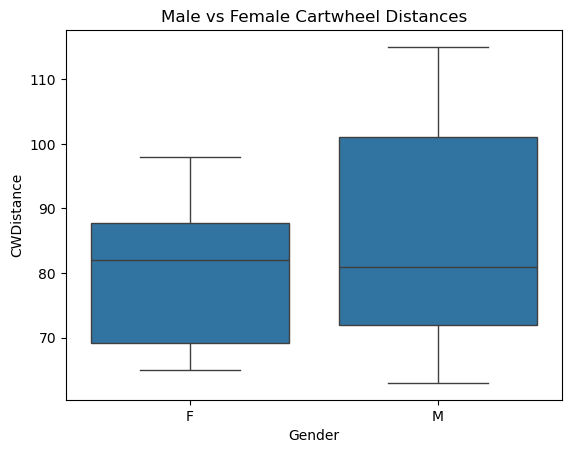

In [21]:
# summarize data for two populations
# numerical summary
print(df_male["CWDistance"].describe())
print(df_fem["CWDistance"].describe())
# graphical summary
sns.boxplot(x="Gender", y="CWDistance", data=df)
plt.title("Male vs Female Cartwheel Distances")
plt.show()

In [ ]:
# comparative boxplot

##  Process Assumptions

The process of CI estimation makes some core assumptions: 

**Population Parameter**

1. Simple Random Sample: Our sample is a simple random sample where every unit has equal probability of selection. This makes the Central Limit Theorem applicable. 
2. Large Enough Sample Size: Our samples contains atleast 10 of all possible response outcomes. This makes the sampling distribution close to normal and ensures the Empirical Rule can apply.

**Population Difference Parameter**

1. Independent Random Samples: Both our samples are random and they are independent.
2. Large Enough Sample Sizes: Both our samples have atleast 10 of all possible response outcomes.

# Hypothesis Testing

It is a type of statistical inference process that allows us to test the validity of our hypothesis about a parameter value. 

## Thought Experiment

We have two bags A and B with different probabilities of drawing Red (1A,0B), Green (2A,3B), Blue (3A,2B), Yellow balls (0A, 1B). We are given a bag and we need to say whether it is A or B.  First, we form the Null Hypothesis ($H_0$) and Alternative Hypothesis ($H_1$). 

* $H_0$: We have bag A
* $H_1$: We have bag B

Now, we can need to look at data (drawing balls) to determine whether $H_0$ holds or we can reject it. We can make two kinds of errors here: 

1. Type 1 Error: Null is true but we reject null
2. Type 2 Error: Null is false but we fail to reject null.

# Research Design